In [21]:
%run ../../functions/Neal_exact_test_functions.ipynb

## 40bit data

In [22]:
df = pd.read_csv('../../../input/ost40.csv', sep=',', index_col=0)
print('40 bit datasets t_list:', calc_marginals(df))

40 bit datasets t_list: [25 13  9]


In [23]:
t1 = np.dot(df['Y'], df['LI'])
print('40 bit datasets t1 is {}'.format(t1))

40 bit datasets t1 is 16


In [24]:
2**40

1099511627776

### 100 reads

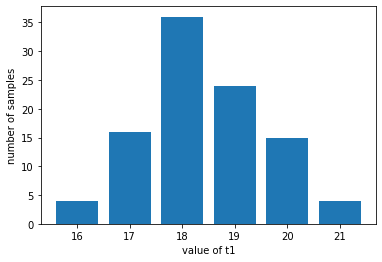

In [5]:
valid_y_list, valid_y_num, hist_dic = y_num_hist(df, num_reads=100, path='../../../output/nealSA_40bit_100numreads')

In [6]:
hist_dic

{18: 36, 17: 16, 19: 24, 20: 15, 16: 4, 21: 4}

In [7]:
valid_y_num

99

In [8]:
valid_y_list

[[0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1],
 [1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1],
 [1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
 

In [9]:
loop = 10
result = timeit.timeit('find_valid_y(df, num_reads=100)', globals=globals(), number=loop)
reads100_time = result / loop
print(reads100_time, '秒')

0.21929318239999995 秒


### 1000 num_reads

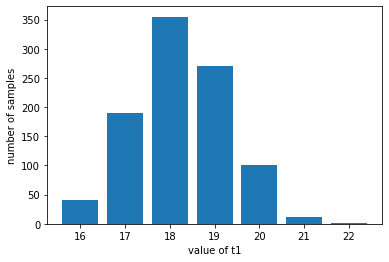

In [10]:
valid_y_list, valid_y_num, hist_dic = y_num_hist(df, num_reads=1000, path='../../../output/nealSA_40bit_1000numreads')

In [11]:
hist_dic

{18: 355, 19: 270, 20: 100, 17: 190, 16: 40, 21: 11, 22: 1}

In [12]:
valid_y_num

967

In [13]:
valid_y_list

[[1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1],
 [1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1],
 [0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1],
 [1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1],
 [0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
 

In [14]:
loop = 10
result = timeit.timeit('find_valid_y(df, num_reads=1000)', globals=globals(), number=loop)
reads1000_time = result / loop
print(reads1000_time, '秒')

4.451132726599999 秒


### 10000 num_reads

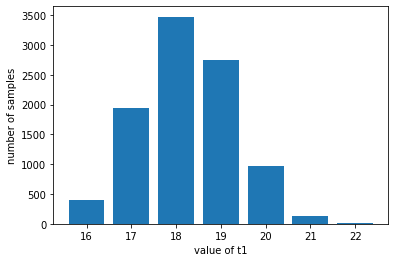

In [15]:
valid_y_list, valid_y_num, hist_dic = y_num_hist(df, num_reads=10000, path='../../../output/nealSA_40bit_10000numreads')

In [16]:
hist_dic

{17: 1938, 19: 2749, 18: 3475, 20: 970, 16: 399, 21: 130, 22: 7}

In [17]:
valid_y_num

9668

In [18]:
valid_y_list

[[1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1],
 [1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1],
 [1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1],
 [0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1],
 [1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
 

In [19]:
loop = 5
result = timeit.timeit('find_valid_y(df, num_reads=10000)', globals=globals(), number=loop)
reads10000_time = result / loop
print(reads10000_time, '秒')

323.0042736248 秒


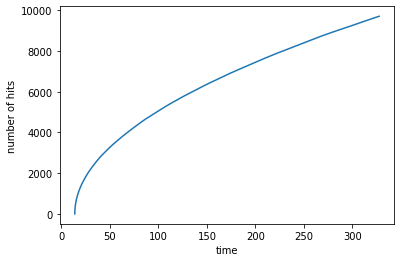

In [20]:
valid_y_list, valid_y_num_list, time_list = time_num_y(
    df, num_reads=10000, 
    path='../../../output/nealSA_40bit_10000numreads_num_time_transition'
)

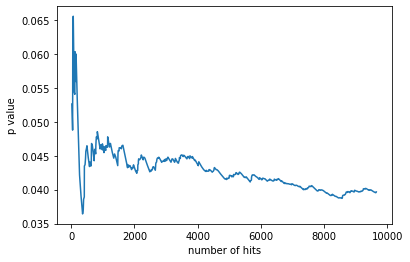

In [25]:
valid_y_num, valid_y_list, p_dic = p_value_transition(
    df, num_reads=10000, 
    output_path='../../../output/nealSA_40bit_10000numreads_p_value_transition')